<a href="https://colab.research.google.com/github/philBram/machine_learning_with_tensorflow_project/blob/main/colorize_black_and_white.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from pycocotools.coco import COCO

In [ ]:
train_dir = 'train2017'
val_dir = 'val2017'
test_dir = 'test2017'
annotations_dir = 'annotations'

if os.path.exists(train_dir) and os.path.exists(val_dir) and os.path.exists(test_dir) and os.path.exists(annotations_dir):
    print("COCO dataset is already downloaded and unzipped.")
else:
  !wget  http://images.cocodataset.org/zips/train2017.zip
  !wget  http://images.cocodataset.org/zips/val2017.zip
  !wget  http://images.cocodataset.org/zips/test2017.zip
  !wget  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
  
  !unzip -q train2017.zip
  !unzip -q val2017.zip
  !unzip -q test2017.zip
  !unzip -q annotations_trainval2017.zip

  !rm -f train2017.zip
  !rm -f val2017.zip
  !rm -f test2017.zip
  !rm -f annotations_trainval2017.zip

In [ ]:
annFile = 'annotations/instances_train2017.json'
coco = COCO(annFile)

categories = coco.loadCats(coco.getCatIds())

print('\nTotal number of training images:', len(os.listdir(train_dir)))
print('Total number of validation images:', len(os.listdir(val_dir)))
print('Total number of test images:', len(os.listdir(test_dir)))

print("Total number of categories:", len(categories))
print("\nCategory information:\n")

for category in categories:
    print("Category ID:", category['id'])
    print("Category Name:", category['name'])
    print("Number of images:", len(coco.getImgIds(catIds=category['id'])))
    print("----")

In [ ]:
def create_black_and_white(source_dir, dest_dir):
  images_list = os.listdir(source_dir)

  for image in images_list:
    color_image_path = os.path.join(source_dir, image)
    gray_image_path = os.path.join(dest_dir, image)

    color_image = cv2.imread(color_image_path)
    gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

    cv2.imwrite(gray_image_path, gray_image)

In [ ]:
train_gray_dir = 'train2017_gray'
val_gray_dir = 'val2017_gray'
test_gray_dir = 'test2017_gray'

if os.path.exists(train_gray_dir) and os.path.exists(val_gray_dir) and os.path.exists(test_gray_dir):
    print("Images are already grayed.")
else:
  os.mkdir(train_gray_dir)
  os.mkdir(val_gray_dir)
  os.mkdir(test_gray_dir)
  
  create_black_and_white(train_dir, train_gray_dir)
  create_black_and_white(val_dir, val_gray_dir)
  create_black_and_white(test_dir, test_gray_dir)

Images are already grayed.


In [ ]:
def show_images(source_dir, ncols=5, nrows=5, gray=False):
  fig = plt.gcf()
  fig.set_size_inches(ncols * 4, nrows * 4)
  
  images = np.array(os.listdir(source_dir))
  dir_size = len(os.listdir(source_dir))
  pic_index = np.random.randint(0, dir_size, ncols * nrows)
  
  images_random = [os.path.join(source_dir, fname) for fname in images[pic_index]]
  
  # display random color images
  for i, img_path in enumerate(images_random):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
  
    img = mpimg.imread(img_path)

    if gray:
      plt.imshow(img, cmap='gray')
    else:
      plt.imshow(img)
  
  plt.tight_layout()
  plt.show()

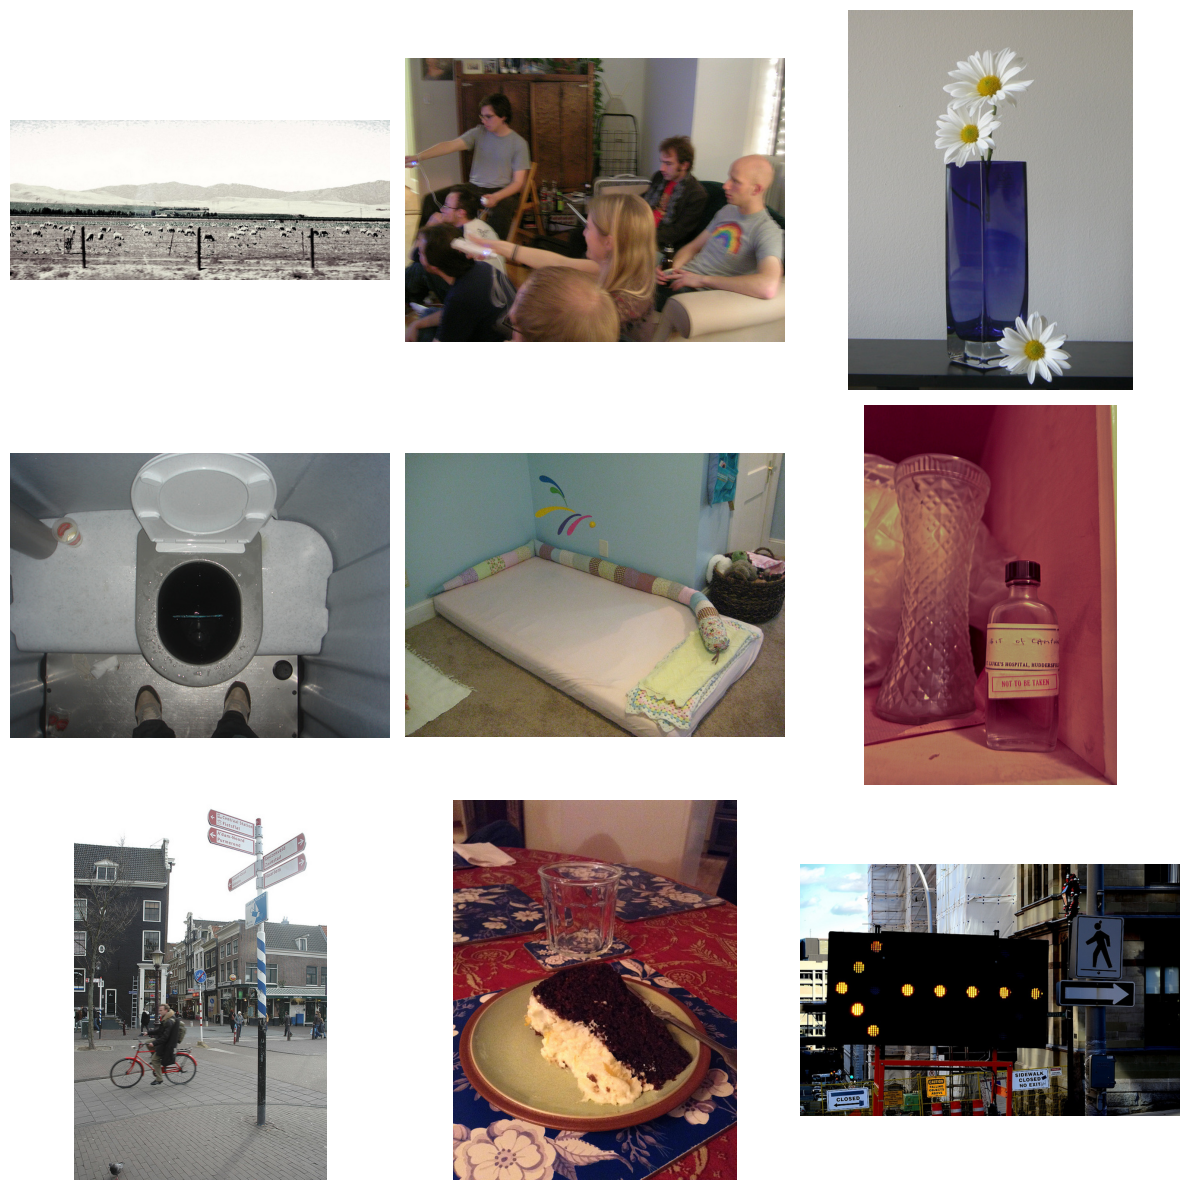

In [ ]:
show_images(train_dir, ncols=3, nrows=3)

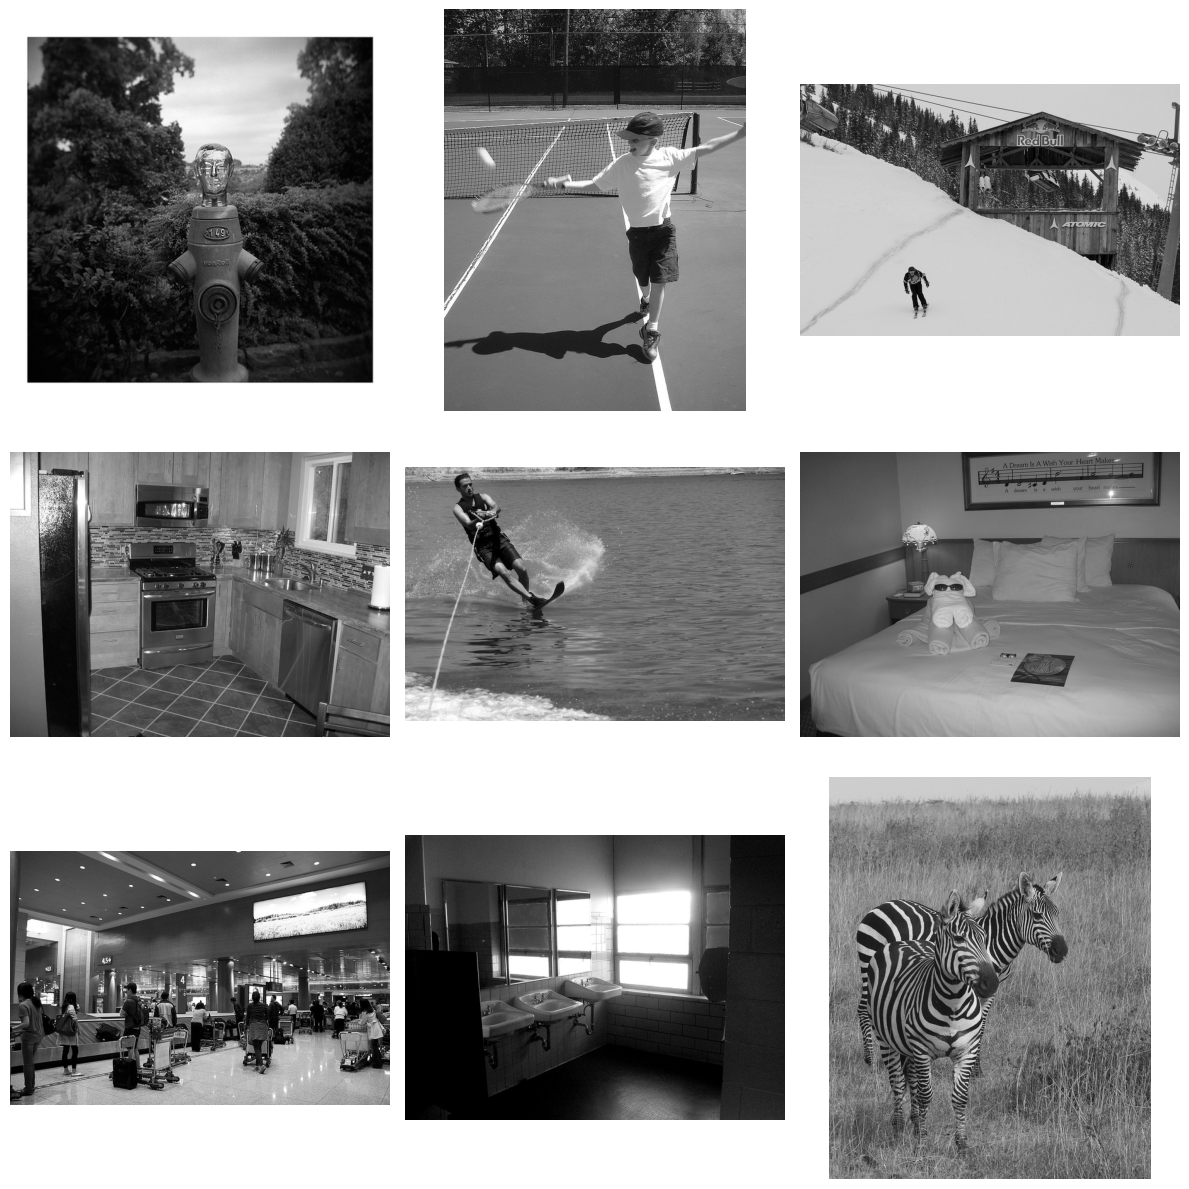

In [ ]:
show_images(train_gray_dir, ncols=3, nrows=3, gray=True)